In [1]:
import pandas as pd


🧩 Step 1: Import Libraries & Load Data

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()
# df.memory_usage(deep=True).sum() / 1024

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation: (🧩 Step 1: Import Libraries & Load Data)
Total Columns : 12
Total Rows: 891
Missing Value Column: Age, Cabin and Embarked 
Float Data Types: 
Int64 Data Types:
Text Base (Categorical) Data Types: 5
Toal Memory of dataset:285.609375 KB

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# df['Alone'] = (df['SibSp'] + df['Parch'] == 0)
# df['Alone'].mean()


Observation: 
There are total 891 Passengers in Titanic
Average age of persons is 30 apprximately
Highest Fare of titanic is 512 and average is 32
There are only three type of classes for passengers
60% of the persons who were alone
Mostly 3rd class were provdied to passengers
There may be chance of outliers in Fare

🔍 Step 2: Data Quality Check (Initial Cleaning)

In [7]:
(df.isnull().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.select_dtypes(include=['float64', 'int64']).skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Observation: (🔍 Step 2: Data Quality Check (Initial Cleaning))
Missing Value Column in Age: 19.865320 %
Suggestion for Imputation: Use Mean as Skew value is 0.389108

Missing Value Column in Cabin: 77.104377 %
Too high; consider dropping or extracting Deck information if useful.

Missing Value Column in Embarked:0.224467 %
Suggestion for Imputation: Minor missing values — impute with mode (‘S’) before encoding.

There is no duplication in the dataset (All rows are unique)

Step 3: Univariate Analysis (Single Feature at a Time)

In [48]:
df['Pclass'] 

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

Observation:


<Axes: xlabel='Age', ylabel='Count'>

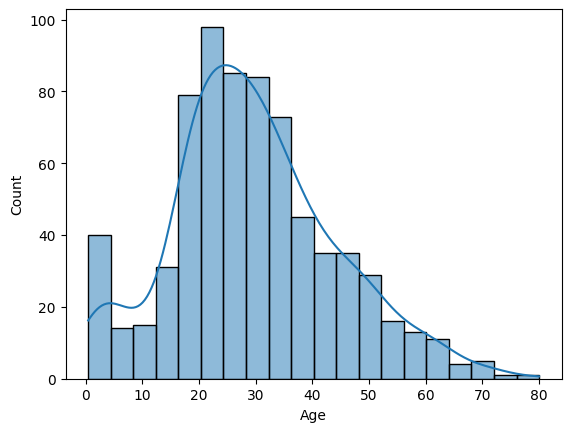

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Age'], kde=True)

In [ ]:
mean = df['Age'].mean()
std = df['Age'].std()

# 1st Standard Deviation range
first_std_lower = mean - std
first_std_upper = mean + std
print("1st Std range:", first_std_lower, "to", first_std_upper)

# Values within ±1 STD (16–44)
within_1std = df[(df['Age'] >= mean - std) & (df['Age'] <= mean + std)] 
# within_1std = df[(df['Age'] >= mean - (2* std)) & (df['Age'] <= mean + (2* std))] # ±2 STD (2–58)

# Count of values
count_within_1std = len(within_1std)
print(count_within_1std) 

1st Std range: 15.172620314724778 to 44.22561497939286
516


<Axes: xlabel='Age'>

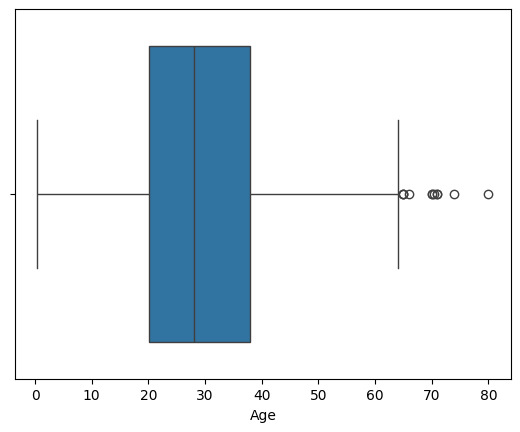

In [16]:
sns.boxplot(x=df['Age'])


In [17]:
df['Age'].median()

np.float64(28.0)

In [ ]:
# Mean and STD of Age
mean = df['Age'].mean()
std = df['Age'].std()

# Values within ±1 STD (16–44)
within_1std = df[(df['Age'] >= mean - std) & (df['Age'] <= mean + std)] 
low1, high1 = mean - std, mean + std
print("±1 STD range:", low1, "to", high1)

within_2nd_std = df[(df['Age'] >= mean - (2* std)) & (df['Age'] <= mean + (2* std))] # ±2 STD (2–58)
low2, high2 = mean - (2* std), mean + (2* std)
print("±2 STD range:", low2, "to", high2)

count_within_1std = len(within_1std) 
count_within_2nd_std = len(within_2nd_std)

# Count of values
first_std_percentage = len(within_1std) * 100 / len(df['Age'])
print(first_std_percentage)


# 58% for ±1 STD (15–44 ages for passengers
second_std_percentage = len(within_2nd_std) * 100 / len(df['Age'])
print(second_std_percentage)

# 77% for ±2 STD (1–59 ages for passengers)

±1 STD range: 15.172620314724778 to 44.22561497939286
±2 STD range: 0.646122982390736 to 58.752112311726904
516
76.87991021324355


Observation: 
58% of passenger are in this range 15 to 44
77% of passenger are in this range 1 to 59

In [ ]:
# Numeric column example: Age
Q1 = df['Age'].quantile(0.25)   # 25th percentile
Q3 = df['Age'].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1

print("Q1:", Q1) # Q1: 20.125
print("Q3:", Q3) # Q3: 38.0
print("IQR:", IQR) # IQR: 17.875

# Outliers
outliers = df[(df['Age'] < Q1 - 1.5*IQR) | (df['Age'] > Q3 + 1.5*IQR)]
print(len(outliers))


Q1: 20.125
Q3: 38.0
IQR: 17.875
11


In [57]:
# Titanic Age Column Example
range_age = df['Age'].max() - df['Age'].min()
print("Range of Age:", range_age)

print("Max Age:", df['Age'].max())
print("Min Age:", df['Age'].min())


Range of Age: 79.58
Max Age: 80.0
Min Age: 0.42


In [42]:
# Mode of Age
mode_age = df['Age'].mode()[0]

# Count of mode value
count_mode = df['Age'].tolist().count(mode_age)
print(count_mode)
print(mode_age)

30
24.0


Observation for Age Column:
Distribution : (Skewed: Right)
Central Tendency (Mean (average age of persons):30)
There are 30 passenger with 24.0 year age
Spread / Variability (  std: 
                        range: 0.42 to 80 year old passenger (range is 80)
                        IQR:Middle 50% of passengers with range of  20.125 to 38
                        58% of passenger are in this range 15 to 44
                        77% of passenger are in this range 1 to 59
                        )
Total no of Outliers (unusual values): 11 
